Validation RMSE: 119.60397263690885
Testing RMSE: 123.67238619396151
Validation MSE: 14305.110270530442
Testing MSE: 15294.859106908361
Validation MAPE: 31866.92466655449
Testing MAPE: 43920.758585248426


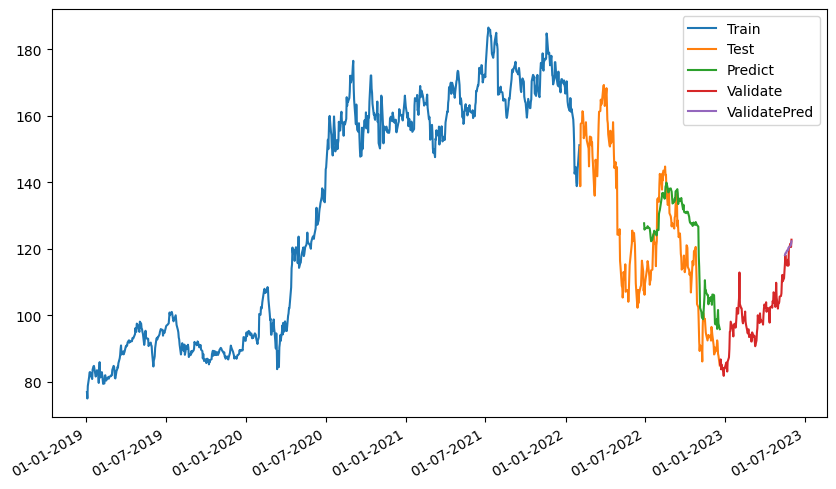

In [1]:
#AMZN 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 13. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 118.94482641942174
Testing RMSE: 137.57270924644584
Validation MSE: 14147.871731946369
Testing MSE: 18926.25032940712
Validation MAPE: 31691.468887548275
Testing MAPE: 38594.81079052319


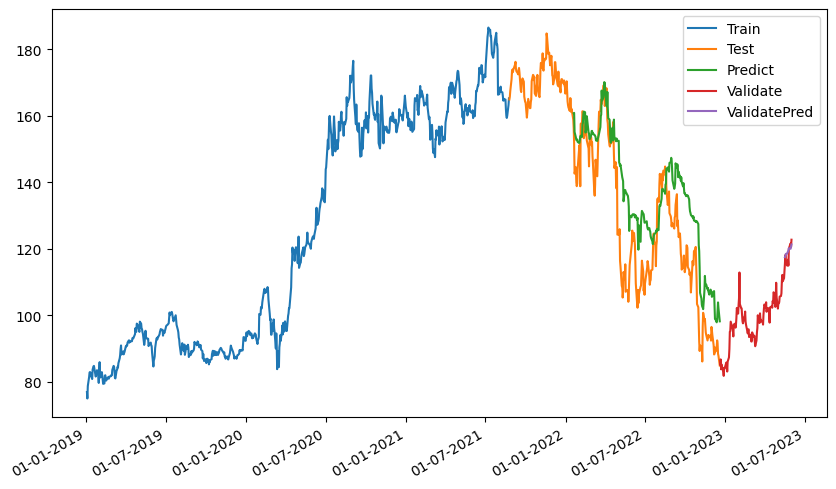

In [2]:
#AMZN 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 101.87311681852813
Testing RMSE: 146.6405704215023
Validation MSE: 10378.13193032148
Testing MSE: 21503.45689354358
Validation MAPE: 56117.904971420045
Testing MAPE: 30758.454316632095


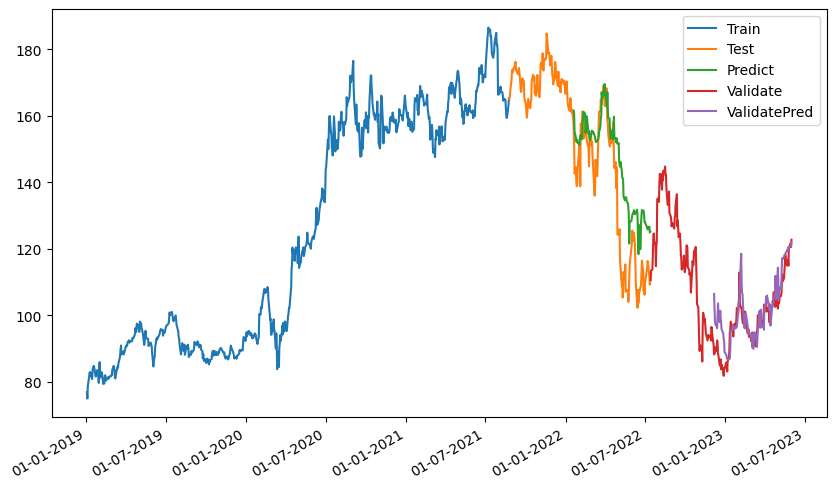

In [3]:
#AMZN 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 119.14959171574121
Testing RMSE: 119.14538934986777
Validation MSE: 14196.625206027828
Testing MSE: 14195.623803331584
Validation MAPE: 154817.27541855315
Testing MAPE: 667769.7831098097


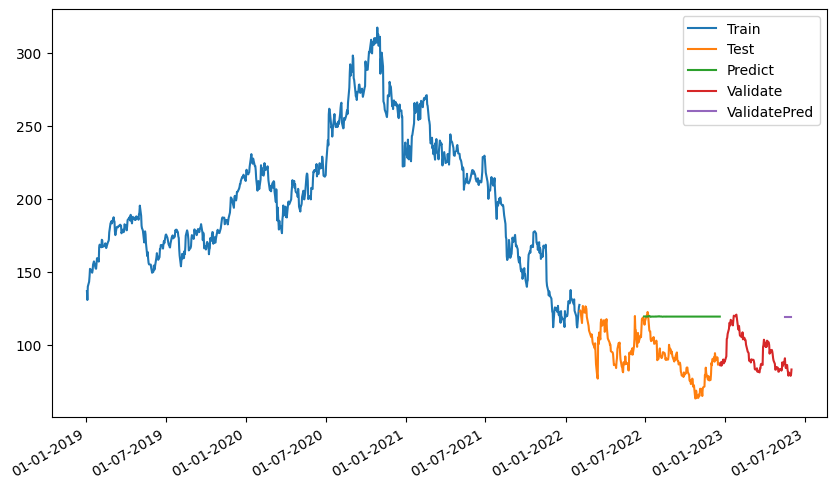

In [4]:
#BABA 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BABA.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)


# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 118.78484576184492
Testing RMSE: 137.7455594842937
Validation MSE: 14109.839582665287
Testing MSE: 18973.83915764109
Validation MAPE: 31648.77067041511
Testing MAPE: 38661.82791921983


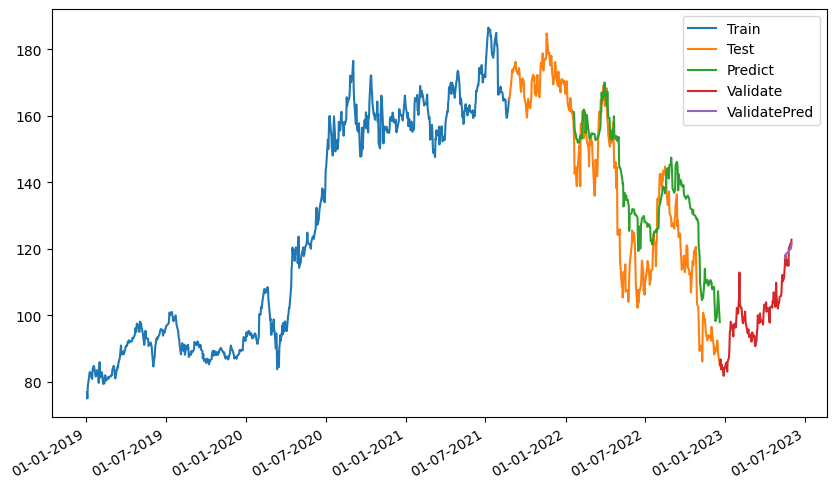

In [5]:
#BABA 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 101.96847038174491
Testing RMSE: 146.4173726364594
Validation MSE: 10397.56895199279
Testing MSE: 21438.04700976381
Validation MAPE: 56182.2242674088
Testing MAPE: 30702.053360295446


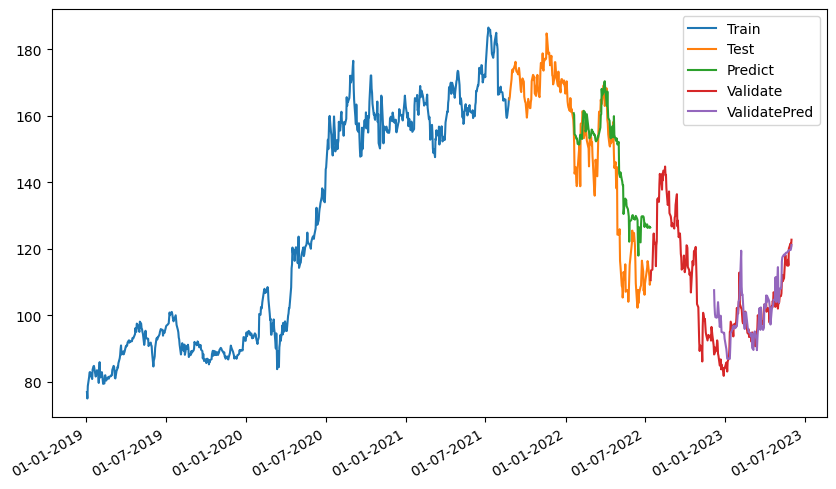

In [6]:
#BABA 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('BABA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 118.98199055634609
Testing RMSE: 122.92967728199393
Validation MSE: 14156.714076750432
Testing MSE: 15111.705556655173
Validation MAPE: 31701.387011114064
Testing MAPE: 43618.776569944996


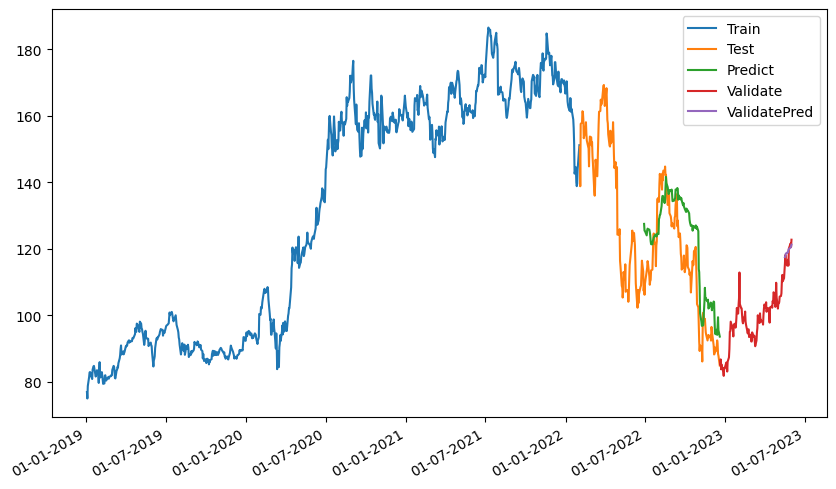

In [7]:
#EBAY 7:2:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 119.12550025484947
Testing RMSE: 137.36742514362402
Validation MSE: 14190.884810968142
Testing MSE: 18869.80949058915
Validation MAPE: 31739.330705419048
Testing MAPE: 38526.34254809094


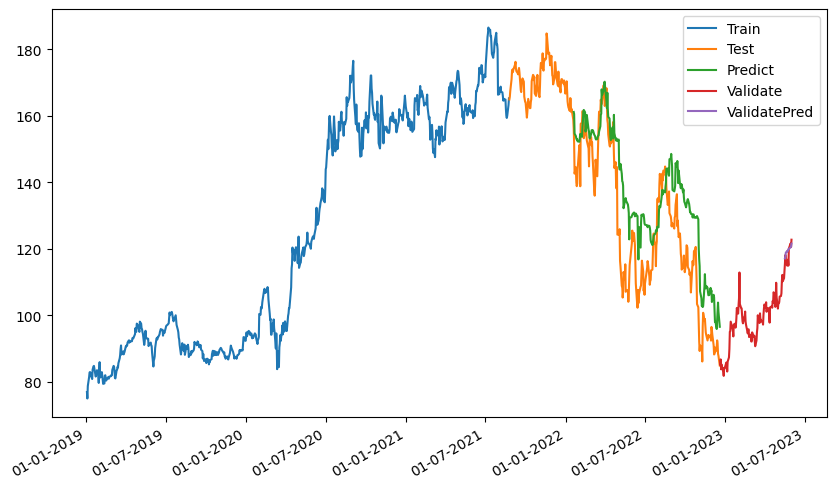

In [8]:
#EBAY 6:3:1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()

Validation RMSE: 102.02337718448086
Testing RMSE: 146.84754462547667
Validation MSE: 10408.76949212685
Testing MSE: 21564.201362531363
Validation MAPE: 56208.62539453455
Testing MAPE: 30805.849259305643


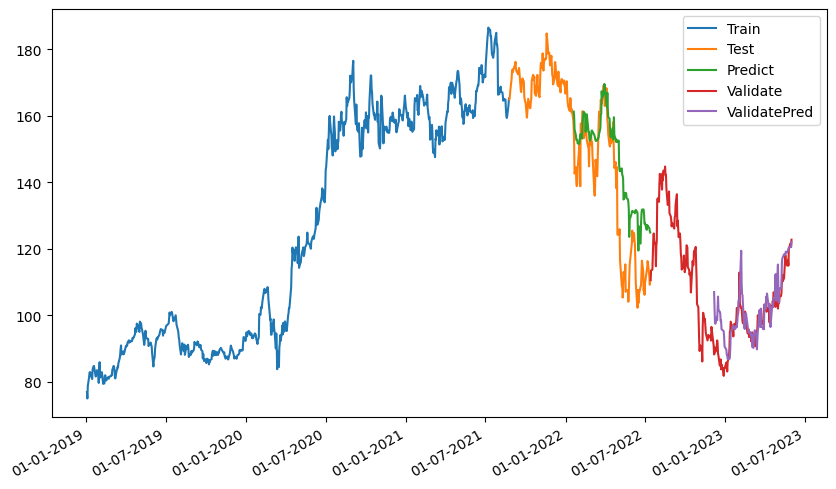

In [9]:
#EBAY 6:2:2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('AMZN.csv')
df1 = df.reset_index()['Close']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Định nghĩa và huấn luyện mô hình Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 8. Dự đoán giá trị train, test và validation
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)


# 9. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))

# 10. Đánh giá độ chính xác
import numpy as np

# Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Tính MSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 11. Vẽ biểu đồ
from matplotlib import dates
df = pd.read_csv('EBAY.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close']

plt.figure(figsize=(10, 6))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%Y'))
# Xoay và căn chỉnh nhãn trục x
plt.gcf().autofmt_xdate()

plt.plot(df1.index[:train_size], scaler.inverse_transform(train_data))
plt.plot(df1.index[train_size:train_size + test_size], scaler.inverse_transform(test_data))
plt.plot(df1.index[train_size+101:train_size + test_size], y_pred[:test_size - time_step, 0])
plt.plot(df1.index[train_size + test_size:train_size + test_size + val_size], scaler.inverse_transform(val_data))
plt.plot(df1.index[train_size + test_size+101:train_size + test_size + val_size], y_pred_val)

plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred'])
plt.show()